In [1]:
import yfinance as yf
from pandas import MultiIndex, Int16Dtype
from datetime import datetime, timedelta
import datetime
from datetime import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
import warnings

In [6]:
def peratio(closing_price, time):
    time1 = pd.Timestamp(date(year = 2019, month = 10, day=30))
    time2 = pd.Timestamp(date(year = 2020, month = 10, day=30))
    time3 = pd.Timestamp(date(year = 2021, month = 10, day=30))
    time4 = pd.Timestamp(date(year = 2022, month = 10, day=30))
    time5 = pd.Timestamp(date(year = 2023, month = 3, day=30))
    earnings = np.array([[time1,6.43],[time2,6.31], [time3,14.96],[time4, 26.46],[time5, 32.14]])
    value = earnings[0,1]
    ratio = closing_price / value
    for i in range(earnings.shape[0]):
        earnings_time1 = earnings[i,0]
        if (earnings_time1 < time.tz_localize(None)):
            value = earnings[i,1]
            ratio =  closing_price / value
        else:
            break  
    return ratio

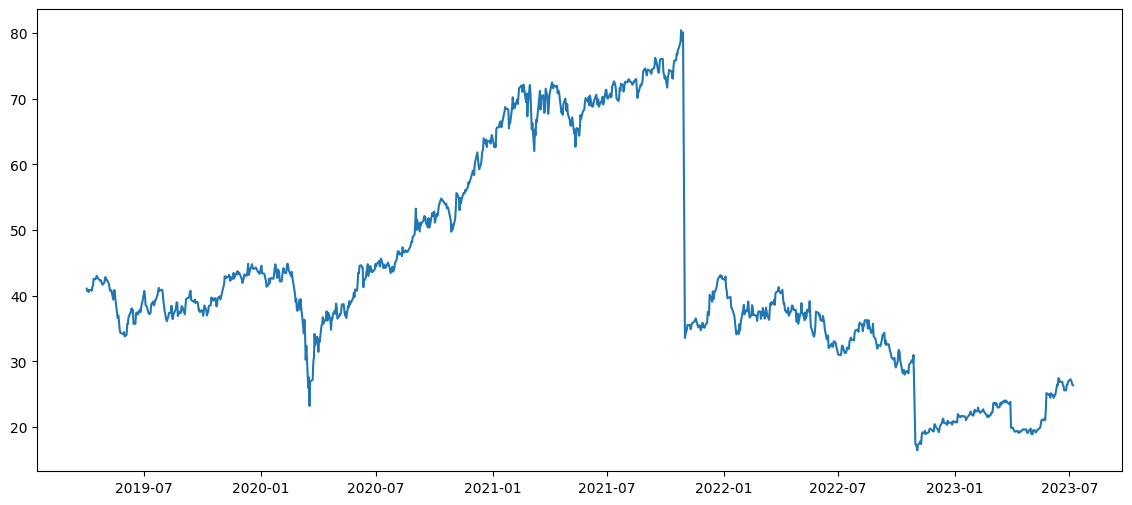

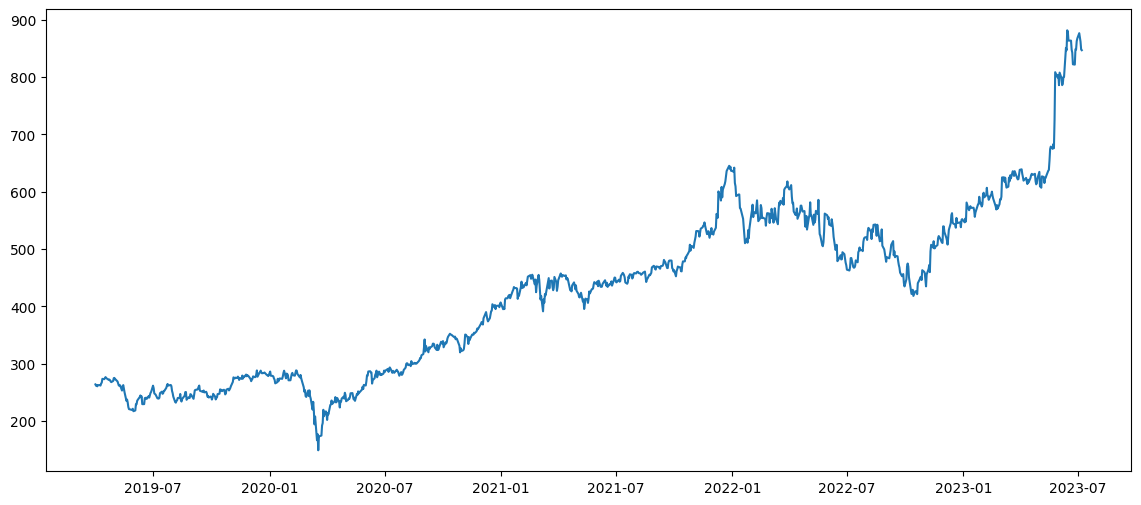

In [7]:
tickerSymbol = 'AMZN'
earnings = [6.43, 6.31, 14.96, 26.46, 32.14]
data = yf.Ticker(tickerSymbol)
raw = data.history(interval="1d",start = "2019-04-01", end = "2023-07-10")
raw["PE Ratio"] = np.vectorize(peratio)(raw["Close"], raw.index)
raw["Date"] = pd.to_datetime(raw.index)
raw.set_index(keys = "Date")
figure(figsize=(14, 6))
plt.plot(raw["PE Ratio"])
figure(figsize=(14, 6))
plt.plot(raw["Close"])